In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ekene\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Nov 11 21:27:20 2024).


In [36]:
# filter for only nigerian jobs
df_ng_jobs = df[df['job_country'] == 'Nigeria'].copy() # creating a copy just for necessity reason

In [37]:
df_ng_jobs.sample(5)  # to see a sample of the data, duh!

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
500831,Data Analyst,Data Analyst,"Lagos, Nigeria",via MyJobMag,Full-time,False,Nigeria,2023-07-05 11:20:14,False,False,Nigeria,None,NaN,NaN,Integrated Automotive Services,None,None
410021,Data Engineer,Data Engineer – Big Data at Propel,"Lagos, Nigeria",via Trabajo.org,Full-time,False,Nigeria,2023-01-08 16:16:48,False,False,Nigeria,None,NaN,NaN,Propel,"['nosql', 'sql', 'java', 'c++', 'python', 'had...","{'libraries': ['hadoop', 'kafka', 'spark'], 'p..."
487774,Senior Data Engineer,Senior Data Engineer,"Lagos, Nigeria",via MyJobMag,Full-time,False,Nigeria,2023-04-28 11:12:39,False,False,Nigeria,None,NaN,NaN,Renmoney,"['python', 'sql', 'nosql', 'mongodb', 'mongodb...","{'cloud': ['aws', 'redshift'], 'databases': ['..."
676555,Software Engineer,Senior Software Engineer - Distributed Computing,"Emeabiam, Nigeria",via Wellfound,Full-time,False,Nigeria,2023-11-16 10:27:45,True,False,Nigeria,None,NaN,NaN,Trade Desk,"['sql', 'sql server', 'redis', 'kafka', 'docke...","{'databases': ['sql server', 'redis'], 'librar..."
442221,Data Engineer,Staff / Senior Machine Learning/Data Engineer,Anywhere,via LinkedIn Nigeria,Full-time,True,Nigeria,2023-05-09 17:03:15,False,False,Nigeria,None,NaN,NaN,Viamo,"['go', 'php', 'python', 'sql', 'mysql', 'bigqu...","{'cloud': ['bigquery', 'aws', 'gcp'], 'databas..."


In [38]:
# creating a new column of job_posted_month to extract out the month 
df_ng_jobs['job_month'] = df_ng_jobs['job_posted_date'].dt.strftime('%B') # the months in verbiage format, not numerical
df_ng_jobs.sample(5) # inspecting...

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
500831,Data Analyst,Data Analyst,"Lagos, Nigeria",via MyJobMag,Full-time,False,Nigeria,2023-07-05 11:20:14,False,False,Nigeria,None,NaN,NaN,Integrated Automotive Services,None,None,July
112041,Data Scientist,Data Scientist,Anywhere,via Emprego.pt,Full-time,True,Nigeria,2023-01-22 00:20:41,False,False,Nigeria,None,NaN,NaN,Summitech,"['r', 'python']","{'programming': ['r', 'python']}",January
459029,Data Scientist,Lead Data Scientist at Signal Alliance Limited,"Lagos, Nigeria",via BeBee Nigeria,Full-time,False,Nigeria,2023-07-23 15:15:40,False,False,Nigeria,None,NaN,NaN,Signal Alliance Limited,"['r', 'python', 'sql', 'mysql', 'azure', 'data...","{'analyst_tools': ['ssis', 'power bi', 'tablea...",July
97990,Senior Data Scientist,Senior Data Scientist (Card Payments and Spark),Nigeria,via Jobs - WhatJobs,Full-time,False,Nigeria,2023-08-18 00:20:29,False,False,Nigeria,None,NaN,NaN,Fraudio,"['python', 'scala', 'sql', 'nosql', 'databrick...","{'cloud': ['databricks'], 'libraries': ['spark...",August
56319,Data Analyst,Data Analytics Manager,Nigeria,via MyJobMag,Full-time,False,Nigeria,2023-01-19 06:58:08,False,False,Nigeria,None,NaN,NaN,Code for Africa,"['r', 'python', 'matlab', 'sql', 'trello', 'sl...","{'async': ['trello'], 'programming': ['r', 'py...",January


In [39]:
# creating our pivot table..
df_ng_pivot = df_ng_jobs.pivot_table(index= 'job_month', columns= 'job_title_short', aggfunc= 'size')
df_ng_pivot.reset_index(inplace = True)
df_ng_pivot.sample(5)  #inspecting

job_title_short,job_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
5,July,5.0,1.0,45.0,22.0,28.0,1.0,2.0,4.0,2.0,8.0
6,June,11.0,NaN,19.0,13.0,12.0,3.0,3.0,3.0,5.0,8.0
1,August,4.0,2.0,21.0,13.0,22.0,1.0,2.0,1.0,3.0,12.0
0,April,3.0,1.0,26.0,26.0,19.0,3.0,1.0,2.0,5.0,12.0
11,September,9.0,6.0,38.0,16.0,28.0,4.0,NaN,8.0,2.0,8.0


In [40]:
# convert the month column back to numerical format for ease of chronolgical manipulation
df_ng_pivot['month_no'] = pd.to_datetime(df_ng_pivot['job_month'], format= '%B').dt.month
df_ng_pivot['month_no']


0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [41]:
# chronological arrangement
df_ng_pivot.sort_values('month_no', inplace= True)

In [42]:
df_ng_pivot

job_title_short,job_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,15.0,4.0,37.0,20.0,21.0,4.0,2.0,5.0,6.0,19.0,1
3,February,5.0,3.0,40.0,19.0,22.0,1.0,3.0,3.0,2.0,9.0,2
7,March,5.0,3.0,19.0,21.0,13.0,NaN,NaN,2.0,2.0,24.0,3
0,April,3.0,1.0,26.0,26.0,19.0,3.0,1.0,2.0,5.0,12.0,4
8,May,2.0,3.0,24.0,15.0,15.0,1.0,NaN,1.0,1.0,4.0,5
6,June,11.0,NaN,19.0,13.0,12.0,3.0,3.0,3.0,5.0,8.0,6
5,July,5.0,1.0,45.0,22.0,28.0,1.0,2.0,4.0,2.0,8.0,7
1,August,4.0,2.0,21.0,13.0,22.0,1.0,2.0,1.0,3.0,12.0,8
11,September,9.0,6.0,38.0,16.0,28.0,4.0,NaN,8.0,2.0,8.0,9
10,October,4.0,5.0,14.0,9.0,11.0,6.0,4.0,2.0,4.0,6.0,10


In [43]:
df_ng_pivot.set_index('job_month', inplace= True) # resetting the job_month as the index

In [45]:
df_ng_pivot.drop(columns='month_no', inplace= True) # kicking out the month number column as we are done with it, Bye Bitch!

In [46]:
df_ng_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_month,,,,,,,,,,
January,15.0,4.0,37.0,20.0,21.0,4.0,2.0,5.0,6.0,19.0
February,5.0,3.0,40.0,19.0,22.0,1.0,3.0,3.0,2.0,9.0
March,5.0,3.0,19.0,21.0,13.0,NaN,NaN,2.0,2.0,24.0
April,3.0,1.0,26.0,26.0,19.0,3.0,1.0,2.0,5.0,12.0
May,2.0,3.0,24.0,15.0,15.0,1.0,NaN,1.0,1.0,4.0
June,11.0,NaN,19.0,13.0,12.0,3.0,3.0,3.0,5.0,8.0
July,5.0,1.0,45.0,22.0,28.0,1.0,2.0,4.0,2.0,8.0
August,4.0,2.0,21.0,13.0,22.0,1.0,2.0,1.0,3.0,12.0
September,9.0,6.0,38.0,16.0,28.0,4.0,NaN,8.0,2.0,8.0


In [51]:
# picking out the top 3 jobs
top_3 = df_ng_jobs['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

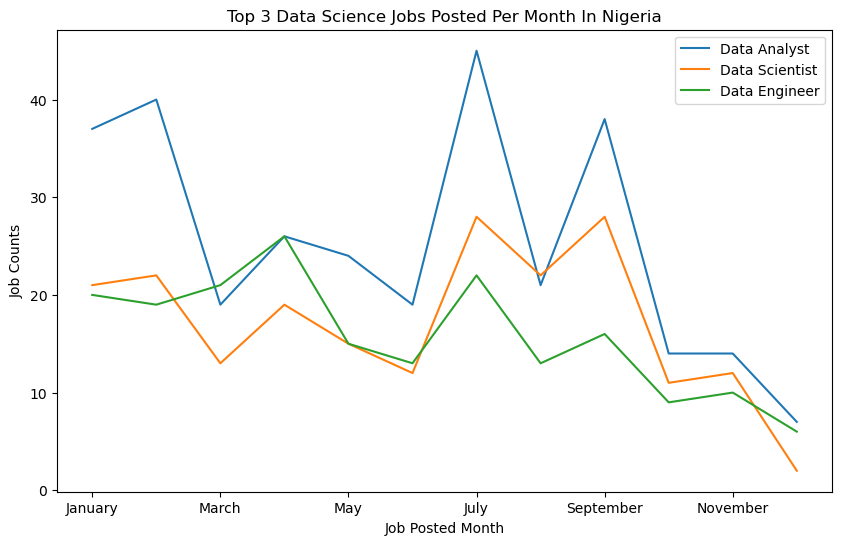

In [52]:
# plotting our graph
df_ng_pivot[top_3].plot(kind= 'line', figsize= (10,6))
plt.xlabel('Job Posted Month')
plt.ylabel('Job Counts')
plt.title('Top 3 Data Science Jobs Posted Per Month In Nigeria')
plt.legend()
plt.show()

Inference:
Apply for Data Analyst Jobs in July and September Guys!!!